In [202]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.lines as mlines
import sympy as sym
import numpy as np
from sympy import pprint, latex, root
from IPython.display import display, Latex
from itertools import combinations
from matplotlib.patheffects import withTickedStroke

# Решение задачи №5

Рассмотрим оптимизационную задачу

\begin{equation*}
	\begin{aligned}
		& \underset{x_1,x_2}{\text{minimize}}
		& & f(x_1, x_2) = (-(1.5\cdot(x_1 + 0.5))^2 + x_2 + 2)^2 + x_2^2\\
		& \text{subject to}
		& & g_1(x_1, x_2) = -0.2 x_1^2 - x_2 + 0.5 \leq 0\\
    &
    & & g_2(x_1, x_2) = -x_1 - x_2 - 1 \leq 0\\
    &
    & & g_3(x_1, x_2) = (x_1 + 1.5)^2 - (x_2 + 1.5)^2 + 2 \leq 0\\
	\end{aligned}
\end{equation*}

Для начала построим область, задаваемую ограничениями $g_i$

/var/folders/81/rb_q3ysn6cn6yl6c4g9w2lp00000gn/T/ipykernel_53919/3139031076.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g1, levels=[0], colors='blue', linewidths=1.5, linestyles='--', label='$g_1(x_1, x_2) = 0$')
/var/folders/81/rb_q3ysn6cn6yl6c4g9w2lp00000gn/T/ipykernel_53919/3139031076.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g2, levels=[0], colors='green', linewidths=1.5, linestyles='--', label='$g_2(x_1, x_2) = 0$')
/var/folders/81/rb_q3ysn6cn6yl6c4g9w2lp00000gn/T/ipykernel_53919/3139031076.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g3, levels=[0], colors='red', linewidths=1.5, linestyles='--', label='$g_3(x_1, x_2) = 0$')


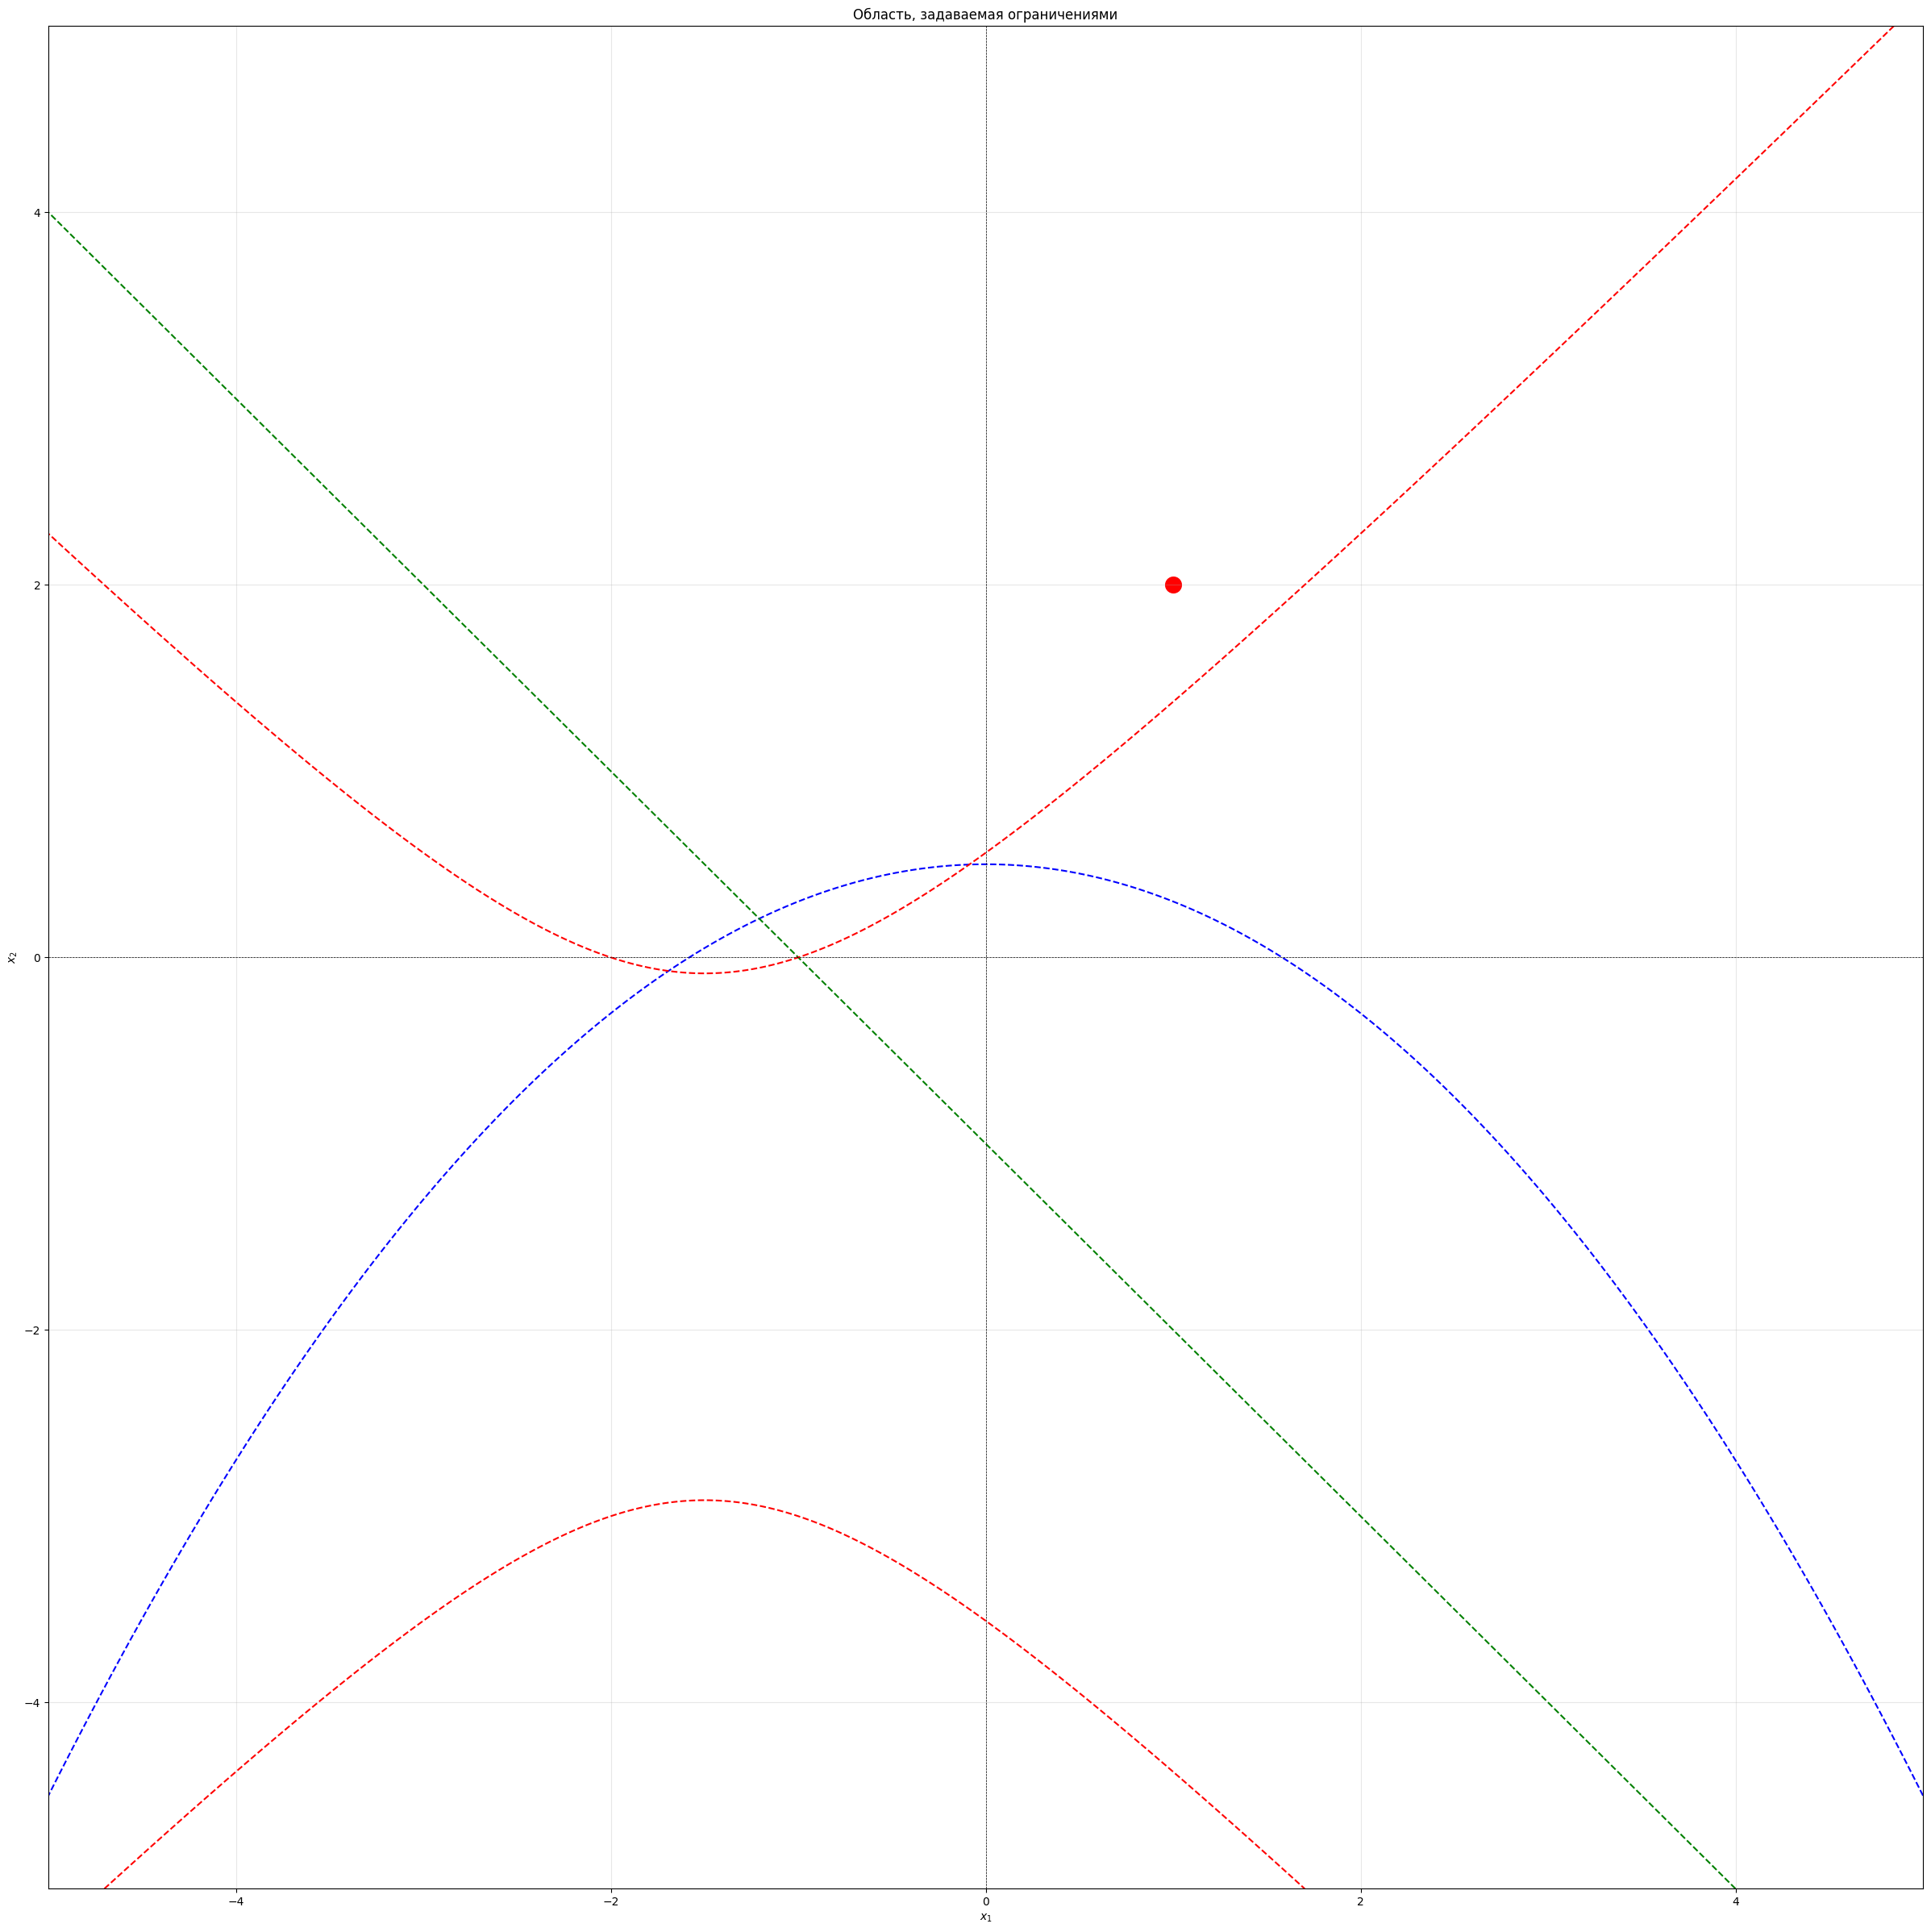

In [203]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-5, 5, 1000)  
x2 = np.linspace(-5, 5, 1000)  
X1, X2 = np.meshgrid(x1, x2)

g1 = -0.2 * X1**2 - X2 + 0.5
g2 = -X1 - X2 - 1
g3 = (X1 + 1.5)**2 - (X2 + 1.5)**2 + 2

region_g1 = g1 <= 0
region_g2 = g2 <= 0
region_g3 = g3 <= 0

plt.figure(figsize=(30, 30))

plt.contour(X1, X2, g1, levels=[0], colors='blue', linewidths=1.5, linestyles='--', label='$g_1(x_1, x_2) = 0$')
plt.contour(X1, X2, g2, levels=[0], colors='green', linewidths=1.5, linestyles='--', label='$g_2(x_1, x_2) = 0$')
plt.contour(X1, X2, g3, levels=[0], colors='red', linewidths=1.5, linestyles='--', label='$g_3(x_1, x_2) = 0$')

plt.title("Область, задаваемая ограничениями")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(alpha=0.3)
x_point = 1
y_point = 2
plt.scatter(x_point, y_point, color='red', s = 200)
plt.show()


Нас интересует область, в которой лежит красная точка

Также заметим, что ограничение $g_1$ никак не влияет на нашу область => нет смысла его учитывать как ограничение при поиске минимумов

Нами была найдена точка с коррдинатами (1, 2) которая удовлетворяет всем ограничениям $\rightarrow$ есть регулярность => $\lambda = 1$

Далее найдем нужные нам значения $\nabla f, \nabla_{xx} f$

In [204]:
#поиск градиента
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

f =  (-(1.5*(x1 + 0.5))**2 + x2 + 2)**2 + x2**2

grad_f = sp.Matrix([[sp.diff(f, x1)], [sp.diff(f, x2)]]) 

display(grad_f)


Matrix([
[5.0625*(-4*x1 - 2.0)*(0.444444444444444*x2 - (x1 + 0.5)**2 + 0.888888888888889)],
[                                               4.0*x2 - 4.5*(x1 + 0.5)**2 + 4.0]])

In [205]:
#поиск гессиана

gess_f = sp.Matrix([[sp.diff(grad_f[0],x1), sp.diff(grad_f[0],x2)],
                  [sp.diff(grad_f[1],x1), sp.diff(grad_f[1],x2)]])

display(gess_f)

Matrix([
[-9.0*x2 + 5.0625*(-4*x1 - 2.0)*(-2*x1 - 1.0) + 20.25*(x1 + 0.5)**2 - 18.0, -9.0*x1 - 4.5],
[                                                            -9.0*x1 - 4.5,           4.0]])

Ничего о знакоопределенности $\Delta_1$ и $\Delta_2$ мы сказать не можем

Будем искать глобальный минимум функции среди всех локальных

Начнем со случая $I = \{\empty\} \rightarrow -\nabla f = 0$

In [206]:
# случай I = 0
equations = [sp.Eq(grad_f[0], 0), sp.Eq(grad_f[1], 0)]

solution = sp.solve(equations, (x1, x2))

print("Решение системы уравнений:")
display(solution)


Решение системы уравнений:


[(-1.44280904158206, 0.0),
 (-0.500000000000000, -1.00000000000000),
 (0.442809041582063, 0.0)]

Проверим попадают ли точки в область:

In [207]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

g1 = -0.2 * x1**2 - x2 + 0.5
g2 = -x1 - x2 - 1
g3 = (x1 + 1.5)**2 - (x2 + 1.5)**2 + 2

points = solution

def check_point_in_region(point):
    x1_val, x2_val = point

    g1_val = g1.subs({x1: x1_val, x2: x2_val})
    g2_val = g2.subs({x1: x1_val, x2: x2_val})
    g3_val = g3.subs({x1: x1_val, x2: x2_val})
    

    if g1_val <= 0 and g2_val <= 0 and g3_val <= 0:
        return True
    else:
        return False

for point in points:
    if check_point_in_region(point):
        print(f"Точка {point} находится в области.")
    else:
        print(f"Точка {point} НЕ находится в области.")


Точка (-1.44280904158206, 0.0) НЕ находится в области.
Точка (-0.500000000000000, -1.00000000000000) НЕ находится в области.
Точка (0.442809041582063, 0.0) НЕ находится в области.


Проверим случай $I = \{ g_1 \}$ $\rightarrow - \nabla f = \lambda_1 * \nabla(g_1)$ и $g_1 = 0$

Найдем $\nabla(g_1)$

In [208]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

grad_g1 = -0.2 * x1**2 - x2 + 0.5

grad_g1 = sp.Matrix([[sp.diff(g1, x1)], [sp.diff(g1, x2)]]) 

display(grad_g1)

Matrix([
[-0.4*x1],
[     -1]])

Решение системы:

In [209]:
L1 = sp.Symbol('L1', real = 'True')

tmp = -grad_f - L1 * grad_g1

equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g1, 0)]

solution = sp.nsolve(equations, (x1, x2, L1), [-2., 1.0 , 0.])

print("Решение системы уравнений:")
display(solution)


Решение системы уравнений:


Matrix([
[ -1.46177773508911],
[0.0726411706395487],
[ 0.127990829849049]])

$\lambda_1 > 0 \rightarrow$ но найденная точка не принадлежит области

Далее проверим случай $I = \{ g_2 \}$ $\rightarrow - \nabla f = \lambda_2 * \nabla(g_2)$ и $g_2 = 0$

Найдем $\nabla(g_2)$

In [210]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

g2 = -x1 - x2 - 1

grad_g2 = sp.Matrix([[sp.diff(g2, x1)], [sp.diff(g2, x2)]]) 

display(grad_g2)

Matrix([
[-1],
[-1]])

Далее перейдем к решению системы

In [211]:
L2 = sp.Symbol('L2', real = 'True')

tmp = -grad_f - L2 * grad_g2

equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g2, 0)]

solution = sp.nsolve(equations, (x1, x2, L2), [-2., 1.0 , 0.])

print("Решение системы уравнений:")
display(solution)


Решение системы уравнений:


Matrix([
[-1.52924096314252],
[ 0.52924096314252],
[ 1.34994753162264]])

$\lambda_2 > 0 \rightarrow $ точка является локальным минимумом

Далее рассмотрим случай $I = \{ g_3 \}$

Найдем градиент $g_3$

In [212]:
import sympy as sp

x1, x2 = sp.symbols('x1 x2')

g3 = (x1 + 1.5)**2 - (x2 + 1.5)**2 + 2

grad_g3 = sp.Matrix([[sp.diff(g3, x1)], [sp.diff(g3, x2)]]) 

display(grad_g3)

Matrix([
[ 2.0*x1 + 3.0],
[-2.0*x2 - 3.0]])

Решаем систему:

In [213]:
L3 = sp.Symbol('L3', real = 'True')

tmp = -grad_f - L3 * grad_g2

equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g3, 0)]

solution = sp.nsolve(equations, (x1, x2, L3), [-2., 1.0 , 0.])

print("Решение системы уравнений:")
display(solution)


Решение системы уравнений:


Matrix([
[  -1.42913287692962],
[-0.0840119530404671],
[ -0.220843375623684]])

$\lambda_3 < 0 \rightarrow $ нет решения

Далле будем рассматривать 2 ограничения сразу 

Рассмотрим одновременно $g_1$ и $g_2$

In [214]:
tmp = -grad_f - L1*grad_g1 - L2 * grad_g2

# Составляем систему уравнений
equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g1, 0), sp.Eq(g2, 0)]

# Решаем систему уравнений
solution = sp.solve(equations, (x1, x2, L1, L2))

# Выводим решение
print("Решение системы уравнений:")
display(solution)

Решение системы уравнений:


[(-1.20809924354783, 0.208099243547831, -2.90327959715267, 5.47935614713544),
 (6.20809924354783, -7.20809924354783, 4486.34077959715, -4713.66685614714)]

Полученные нами точки нам не подходит, так как $\lambda_i < 0$

Теперь рассмотрим одновременно 2 ограничения $g_2$ и $g_3$

Получаем $I = \{ g_2, g_3 \}$

Решаем полученную систему:

In [215]:
tmp = -grad_f - L2*grad_g2 - L3 * grad_g3

# Составляем систему уравнений
equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g2, 0), sp.Eq(g3, 0)]

# Решаем систему уравнений
solution = sp.solve(equations, (x1, x2, L2, L3))

# Выводим решение
print("Решение системы уравнений:")
display(solution)

Решение системы уравнений:


[(-1.00000000000000, 0.0, 5.57031250000000, -0.898437500000000)]

$ \lambda_3 < 0$ => Точка не является локал. минимумом

Осталось рассмотреть одноверменно $g_1$ и $g_3$

In [216]:
tmp = -grad_f - L1*grad_g1 - L3 * grad_g3

# Составляем систему уравнений
equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g1, 0), sp.Eq(g3, 0)]

# Решаем систему уравнений
solution = sp.nsolve(equations, (x1, x2, L1, L3), [-2., 1.0 , 0., 0.])

# Выводим решение
print("Решение системы уравнений:")
display(solution)

Решение системы уравнений:


Matrix([
[   -1.6922954513274],
[-0.0727727789166825],
[   16.3613539368082],
[  -6.67360556389463]])

Получили, что точка не удовлетворяет условию $\lambda_3 > 0$

Рассмотрим случай сразу 3 активных ограничений $g_1, g_2, g_3$

In [218]:
tmp = -grad_f - L1*grad_g1 - L2*grad_g2 - L3 * grad_g3

# Составляем систему уравнений
equations = [sp.Eq(tmp[0], 0), sp.Eq(tmp[1], 0), sp.Eq(g1, 0), sp.Eq(g2, 0), sp.Eq(g3, 0)]

# Решаем систему уравнений
solution = sp.solve(equations, (x1, x2, L2, L3))

# Выводим решение
print("Решение системы уравнений:")
display(solution)

Решение системы уравнений:


[]

Нет решений

Итого нами был получен всего 1 локал. минимум - с активным ограничением $g_2\newline$
​
Его координаты:$\newline$
$−1.52924096314252\newline
0.52924096314252$
​


/var/folders/81/rb_q3ysn6cn6yl6c4g9w2lp00000gn/T/ipykernel_53919/3670953217.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g1, levels=[0], colors='blue', linewidths=1.5, linestyles='--', label='$g_1(x_1, x_2) = 0$')
/var/folders/81/rb_q3ysn6cn6yl6c4g9w2lp00000gn/T/ipykernel_53919/3670953217.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g2, levels=[0], colors='green', linewidths=1.5, linestyles='--', label='$g_2(x_1, x_2) = 0$')
/var/folders/81/rb_q3ysn6cn6yl6c4g9w2lp00000gn/T/ipykernel_53919/3670953217.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, g3, levels=[0], colors='red', linewidths=1.5, linestyles='--', label='$g_3(x_1, x_2) = 0$')


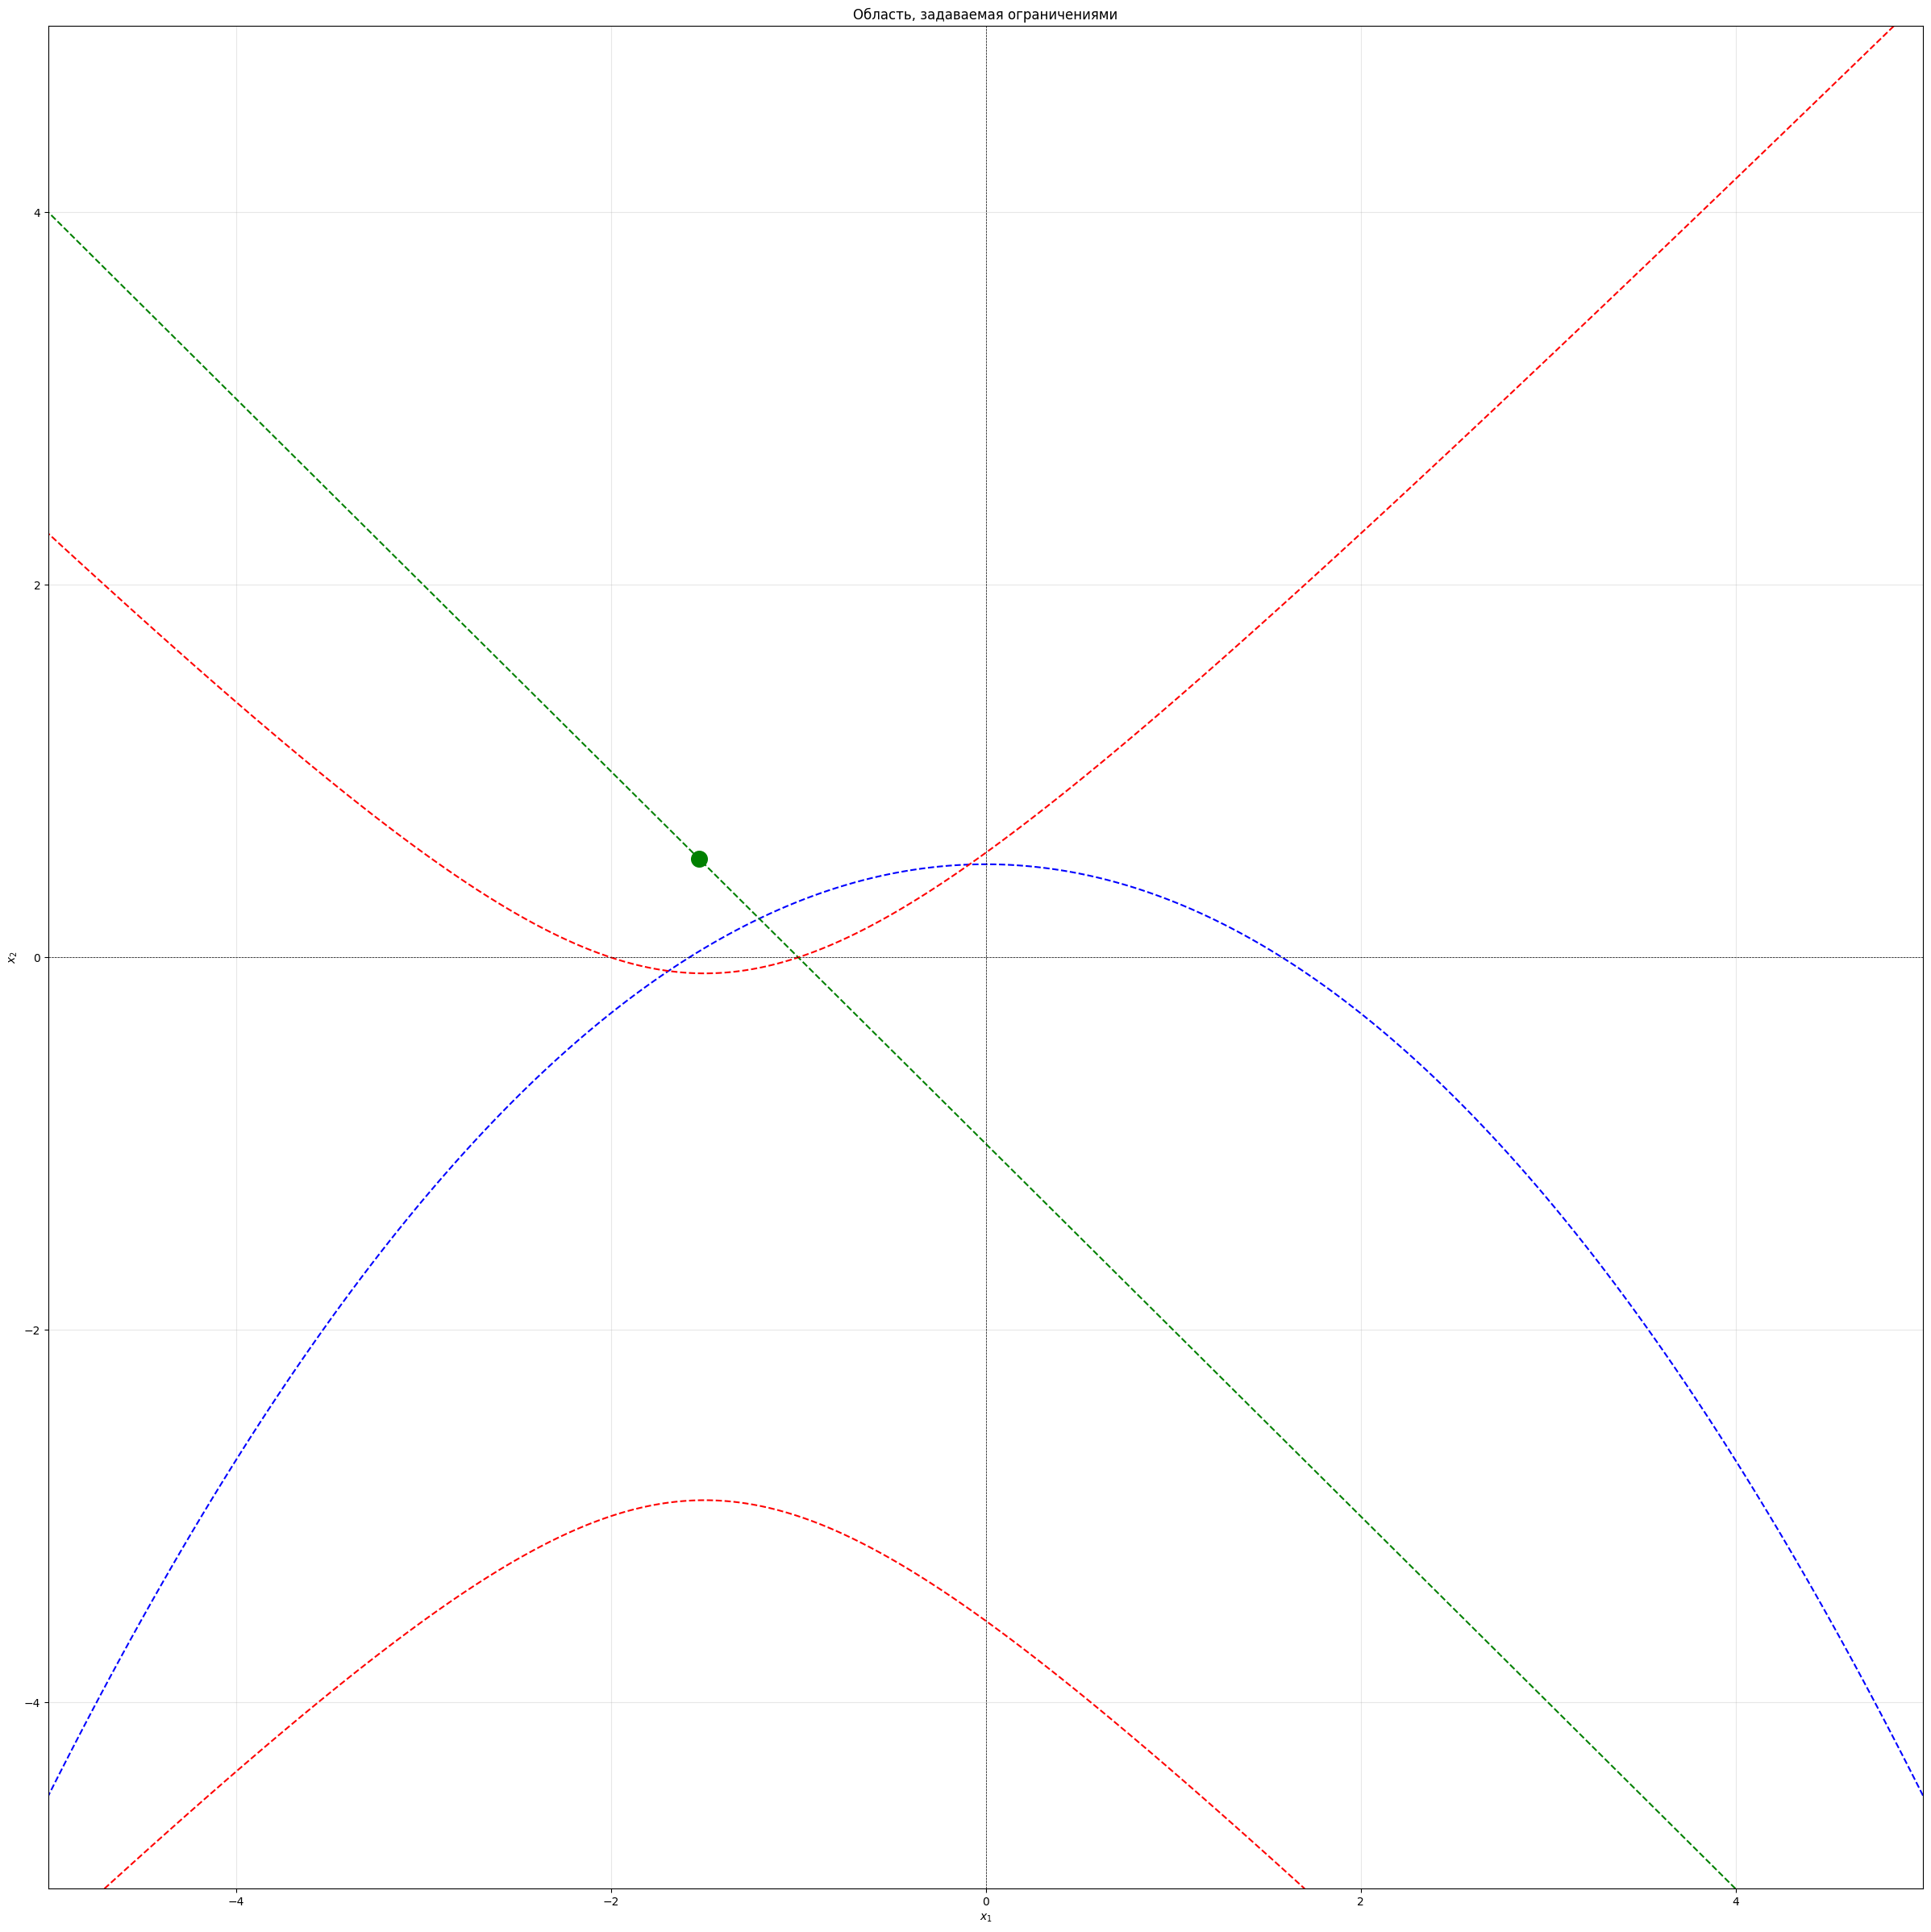

In [220]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-5, 5, 1000)  
x2 = np.linspace(-5, 5, 1000)  
X1, X2 = np.meshgrid(x1, x2)

g1 = -0.2 * X1**2 - X2 + 0.5
g2 = -X1 - X2 - 1
g3 = (X1 + 1.5)**2 - (X2 + 1.5)**2 + 2

region_g1 = g1 <= 0
region_g2 = g2 <= 0
region_g3 = g3 <= 0

plt.figure(figsize=(30, 30))

plt.contour(X1, X2, g1, levels=[0], colors='blue', linewidths=1.5, linestyles='--', label='$g_1(x_1, x_2) = 0$')
plt.contour(X1, X2, g2, levels=[0], colors='green', linewidths=1.5, linestyles='--', label='$g_2(x_1, x_2) = 0$')
plt.contour(X1, X2, g3, levels=[0], colors='red', linewidths=1.5, linestyles='--', label='$g_3(x_1, x_2) = 0$')

plt.title("Область, задаваемая ограничениями")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(alpha=0.3)

x_min = -1.529240
y_min = 0.5292409
plt.scatter(x_min, y_min, color='green', s = 200)

plt.show()
